<a href="https://colab.research.google.com/github/celiaferreira/Covid19_RX/blob/master/8_2_TransferLearning_DataGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 8.2. Transfer learning

Nesta seção avalia-se o poder preditivo da rede pré-treinada InceptionResNetV2.


### 8.2.1. InceptionResNetV2: usar topologia | Pesos treináveis

Como visto na secção 8.1, a importação dos pesos imagenet não tem bons resultados.

Nesta secção vamos usar a arquitetura do modelo pré-treinado InceptionResNetV2 no nosso dataset, mas sem usar os pesos pré-treinados: o modelo será inicializado com pesos aleatórios e treinado de raíz. Para tal, configura-se o argumento weights=None, em vez de weights='Imagenet'.

In [ ]:
from keras.applications import VGG19, InceptionResNetV2, ResNet50
#Inception-ResNet-v2 combines the advantages of Inception networks and residual connections to achieve state-of-the-art accuracy on the ILSVRC image classification benchmark

In [ ]:
InceptionResNetV2_model = InceptionResNetV2(weights=None, include_top=False,	input_tensor=Input(shape=(200, 200, 1)))
#print(InceptionResNetV2_model.summary())

Ao modelo conjugámos camadas de dropout para controlar o overfitting e a camada habitual fully-connected.

In [ ]:
headModel = InceptionResNetV2_model.output
headModel = Dropout(0.5)(headModel)
headModel = Flatten()(headModel)
headModel=Dense(64,activation='relu')(headModel) 
headModel = Dropout(0.2)(headModel)
headModel=Dense(16,activation='relu')(headModel) 
headModel = Dropout(0.2)(headModel)
headModel=Dense(3,activation='softmax')(headModel)
model12 = Model(inputs=InceptionResNetV2_model.input, outputs=headModel)

In [ ]:
InceptionResNetV2_model.trainable = True

model12.compile(optimizers.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history12=model12.fit(X_train2, y_train2, epochs=50,validation_data=(X_val2,y_val2),callbacks = callbacks, verbose=0)

model_save_name = 'InceptionResNetV2_model.sav'
path = F"/content/{model_save_name}" 
torch.save(model12, path)

Epoch 00021: early stopping


Predicted    0    1    2
Actual                  
0          226    5    0
1           35  889    7
2           15  150  679
accuracy total: 0.8943170488534397
precision covid: 0.8188405797101449
recall covid: 0.9783549783549783
precision total: 0.8867230217091001
recall total: 0.9125815220227792
label precision recall
    0     0.819  0.978
    1     0.852  0.955
    2     0.990  0.805
2006/2006 [==============================] - 9s 4ms/step
[0.30629293682984077, 0.8943170309066772]


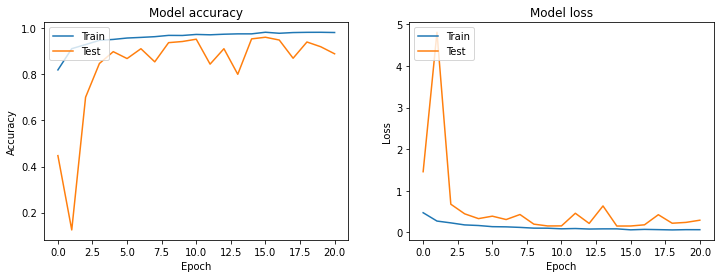

In [ ]:
output_metrics(model12,history12,X_test2, y_test2)

Este modelo origina:

* performance global de 89,4%
* recall COVID: 97,8%
* ausência de overfitting significativo

Isto porque os pesos foram treinados desde a camada extratora de features para o nosso problema.